<div align="right">
  <img src="./imgs/EII-ULPGC-logo.jpeg" width="600">
</div>

# **Aprendizaje por refuerzo 2**

Hemos visto ya cómo funciona el algoritmo **Q-Learning** en su versión simplificada. Ahora dotaremos de mayor formalismo al aprendizaje por refuerzo. Comenzaremos estudiando lo que significa que un sistema tenga la **propiedad de Markov**. Esto nos permitirá modelar un problema de aprendizaje por refuerzo como un conjunto de estados y transiciones probabilísticas entre estados por donde un agente va a transitar.

Analizaremos seguidamente lo que significa **recompensa** y **retorno**, y cómo afecta un **factor de descuento** al retorno obtenido por un agente.

Luego, aplicaremos **retorno con descuento** a un sistema con la propiedad de Markov, lo que llamaremos **proceso de recompensa de Markov**. Aquí veremos con más amplitud las **ecuaciones de Bellman**.

Por último, estudiaremos los dos métodos iniciales del aprendizaje por refuerzo: **value iteration** y **policy value**


## **Propiedad de Markov**

Consiste en que la evolución de un sistema dependa exclusivamente de su estado y de la acción realizada. Es decir, su evolución no depende de los estados anteriores ni de las acciones anteriores. Se dice que el sistema "no tiene memoria". Matemáticamente se expresaría así:


$$ P[s_{t+1} | s_t] = P[s_{t+1} | s_t, s_{t-1}, \cdots ,s_1 ] $$

> El futuro depende únicamente del presente, no del pasado.

Por tanto, un sistema con la **propiedad de Markov** puede ser representado mediante una serie de estados conectados con ciertas probabilidades de transición entre un estado y otro. Por ejemplo, el tiempo atmosférico de día a día podría ser simulado de esta forma:

<img src="./imgs/markov.svg" width=50%>

Esto quiere decir, por ejemplo, que si el martes está nublado hay un 10% de probabilidades de que el miércoles esté soleado. Las probabilidades las podemos representar también mediante una **tabla de probabilidades de transición**, donde la suma de cada fila debe ser 1.

|          | soleado | nublado | lluvioso |
|----------|---------|---------|----------|
| **soleado**  | 0\.6    | 0\.3    | 0\.1     |
| **nublado**  | 0\.1    | 0\.5    | 0\.4     |
| **lluvioso** | 0\.6    | 0\.2    | 0\.2     |


Esto puede generar cadenas de estados, como por ejemplo "$soleado \rightarrow nublado \rightarrow nublado \rightarrow lluvioso$" con una cierta probabilidad de ocurrencia. A estas cadenas las denominamos **cadenas de Markov**.


## **Recompensa y retorno**

Las recompensas son los valores numéricos que recibe el agente al realizar alguna acción en algunos estados del entorno. El valor numérico puede ser positivo o negativo en función de las acciones del agente. En el aprendizaje por refuerzo nos preocupamos por maximizar la recompensa acumulada (todas las recompensas que el agente recibe del entorno) en lugar de las recompensas que recibe en el estado actual (también llamada recompensa inmediata). Esta suma total de recompensas que el agente recibe del entorno lo denominaremos **retorno**.

Por lo tanto, definiremos **retorno** como:

$$ G_t = r_{t+1} + r_{t+2} + \cdots + r_{T} $$

donde $r_{t+1}$ es la recompensa que recibirá el agente en $t$ al realizar la acción $a$. $T$ es el instante final. El objetivo del aprendizaje por refuerzo es maximizar el retorno esperado.


### **Retorno con descuento**

El **factor de descuento $\gamma$** determina cuánta importancia se debe dar a la recompensa inmediata y cuánta a las recompensas futuras. Básicamente, esto nos ayuda a evitar un valor de retorno infinito en tareas continuas. El factor $\gamma$ debe tener un valor mayor que 0 y menor que 1. Un valor cercano al 0 significa que se le da más importancia a la recompensa inmediata y un valor cercano a 1 significa que se le da más importancia a las recompensas futuras. Por lo tanto, los valores comunes para el factor de descuento se encuentran entre 0.2 y 0.8. Por tanto, definimos el **retorno** con **factor de descuento** como: 

$$ G_t = r_{t+1} + \gamma \cdot r_{t+2} + \gamma^2 \cdot r_{t+3} + \cdots$$


Esto significa que a la recompensa $r_{t+1}$ que obtendremos en el próximo paso le daremos todo su valor, pero a la recompensa $r_{t+2}$ que obtendremos después de dos pasos solo le daremos una fracción $\gamma$ de su valor. A la que esté a tres pasos $r_{t+3}$ le daremos una fracción $\gamma$ de la fracción $\gamma$, es decir, $\gamma^2$. Y así sucesivamente.


Supongamos un sistema trivial formado por un solo estado $s$ cuya probabilidad de pasar del estado $s$ a sí mismo es del 100%. La recompensa por hacer esa transición es de, por ejemplo, 27. 

<img src="./imgs/unestado.svg" width=20%>

¿Cuál será la recompensa total acumulada (**retorno**) al cabo de $n$ transiciones? Pues será la recompensa de ese momento: 27, más un porcentaje decreciente de las futuras recompensas. Si suponemos que $\gamma$ vale 0.8, la recompensa total acumulada en 40 pasos será:

Retorno: 134.9820554220569


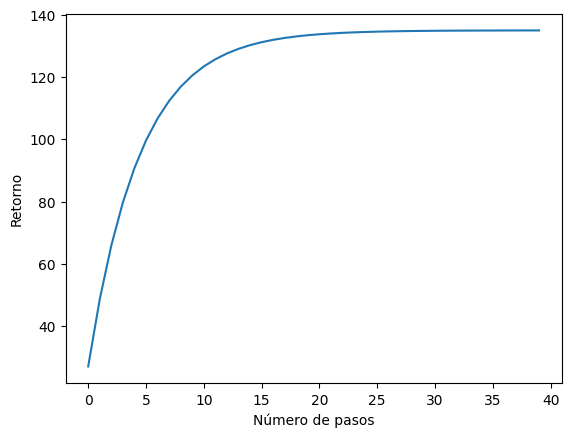

In [2]:
import matplotlib.pyplot as plt
r = 27
gamma = 0.8
G = 0
hist = []
steps = 40

for step in range(steps):
    G = G + gamma**step * r
    # G = r + gamma*G # Otra forma de calcular lo mismo
    hist.append(G)
    
print("Retorno:", G)
plt.plot(hist)
plt.xlabel("Número de pasos")
plt.ylabel("Retorno")
plt.show()

Observamos que el factor $\gamma$ hace que el retorno converja a un valor concreto. ¿Qué pasaría si el valor de $\gamma$ fuera $1.1$? Pruébalo.

Este proceso iterativo que hemos visto:

$$ G_t = r_{t+1} + \gamma \cdot r_{t+2} + \gamma^2 \cdot r_{t+3} + \cdots$$

también puede expresarse de manera recursiva:

$$ G_t = r_{t+1} + \gamma \cdot G_{t+1}$$

Por lo tanto, si la recompensa fuera siempre la misma, podríamos calcular el resultado de manera directa:

$$ G = 27 + 0.8 \cdot G$$

$$ G(1-0.8) = 27 $$

$$ G = \frac{27}{0.2} = 135 $$


### **Proceso de recompensa de Markov (MRP)**

La siguiente figura muestra un grafo con varias transiciones entre estados y sus probabilidades de ocurrencia. 

<img src="./imgs/grafo.svg">

Hemos visto cómo la **propiedad de Markov** en un grafo define la dinámica de un entorno utilizando un conjunto de estados $S$ y una **matriz de probabilidad de transición** $P$. También sabemos ya que el **aprendizaje por refuerzo** tiene que ver con el objetivo de maximizar el retorno, así que añadimos recompensas a nuestras cadenas de Markov. La tabla muestra la recompensa que se obtiene al llegar a un estado.

| a | b  | c  | d |
|---|----|----|---|
| 5 | 37 | 11 | 9 |


y esto nos lleva al **proceso de recompensa de Markov**.


$$ r_s = \mathbb E[r_{t+1} | s_t] $$


Esta fórmula quiere decir que la recompensa inmediata esperada en un estado $s$ viene dada por la [esperanza matemática](https://es.wikipedia.org/wiki/Esperanza_matem%C3%A1tica) de las recompensas de los estados a los que tenga conexión. Por ejemplo, vemos en la figura que el estado $b$ tiene transiciones a los estados $c$ y $a$ con probabilidades 0.05 y 0.95 respectivamente. Por tanto:


$$ r_b = p_{b,c} \cdot r_c + p_{b,a} \cdot r_a = 0.05 \cdot 11 + 0.95 \cdot 5 $$

Finalmente, lo que nos interesa es tener el retorno para cada estado $G_s$, y para eso debemos añadirle un factor de descuento $\gamma$ a nuestro cálculo. Recordemos que partiendo de un estado $s$ generamos una sucesión de estados seleccionados de manera aleatoria (cadena de Markov) por lo que el retorno obtenido en cada cadena es cambiante. Es decir, partiendo del estado $a$ la cadena de estados por la que se pasa puede ser:

$a,b,a,b,c,d,d,d,d \dots$

o

$a,d,d,d,d,d,d,d,d \dots$

Lo cual da resultados diferentes. Al ser aleatoria la dinámica del grafo ¿cómo podemos calcular el retorno promedio para cada estado $G_s$? Una forma podría ser, para cada estado $s$, generar múltiples cadenas de estados y calcular el retorno promedio sobre estas. El siguiente código implementa este método y nos permite calcular cuál es el retorno obtenido para cada estado del grafo. Por ejemplo, vemos que, si partimos desde el estado $a$, el retorno esperado es 90.95.

In [4]:
import numpy as np

# Matriz de transiciones
P = [[0,0.98,0.01,0.01], # a
      [0.95,0,0.05,0],  # b
      [0,0,0,1.0], # c
      [0.1,0,0,0.9]] # d

P = np.array(P)

# Vector de recompensas
R = [5,37,11,9]


states = [0,1,2,3]
steps = 50
episodes = 2000
gamma = 0.8

for s in states:
    GE = 0
    hist = []
    for episode in range(episodes):
        G = 0
        state = s
        for step in range(steps):
            new_state = np.random.choice(states,p=P[state])
            G += gamma**step * R[state]
            state = new_state
        GE += G
        hist.append(GE/(episode+1))

    print("Retorno medio para el estado",s,":", hist[-1])
    # plt.plot(hist)
    # plt.xlabel("Número de episodios")
    # plt.ylabel("Retorno medio")
    # plt.show()

Retorno medio para el estado 0 : 90.99582369994424
Retorno medio para el estado 1 : 107.93998665924593
Retorno medio para el estado 2 : 57.21597346531888
Retorno medio para el estado 3 : 57.900204444056364


### **Problemas episódicos y problemas continuos**

Un problema **episódido** es aquel en el que existe un estado final. Por ejemplo, un juego en el que se gana o se pierde. Un **episodio** consiste en una secuencia de pasos desde un estado inicial a un estado final.

Un problema en el que no existe un estado final se denomina **continuo**. El agente continúa su funcionamiento de forma ilimitada $(T \rightarrow \infty)$.

Para unificar el tratamiento de los problemas continuos y episódicos se asume que a partir del estado final, todas las transiciones conducen al estado final y tienen recompensa 0.


## **Ecuaciones de Bellman**

Podemos llegar a otra forma de calcular lo anterior mediante las ecuaciones de Bellman. Para esto, calcularemos una función de valor $V(s)$ que nos dará para cada estado $s \in S$ el retorno esperado.


$$
V_{t+1}(s) \leftarrow R + \gamma \cdot \mathbb E[ V_t(S_{t+1} | S_t=s)] 
$$


Dado que $V(S)$ es un vector, es posible expresar lo anterior mediante el siguiente cálculo matricial:


$$
\begin{bmatrix}v_1 \\ \vdots \\v_n  \end{bmatrix} \leftarrow \begin{bmatrix}r_1 \\ \vdots \\r_n  \end{bmatrix} + \gamma 
\begin{bmatrix}
p_{1,1} & \cdots & p_{1,n} \\
\vdots & \ddots & \vdots \\
p_{n,1} & \cdots & p_{n,n} \\
\end{bmatrix}
\begin{bmatrix}v_1 \\ \vdots \\v_n  \end{bmatrix}
$$

El siguiente código muestra esta función de manera algorítmica:

In [17]:
import numpy as np

# Matriz de probabilidades de transición
P = [[0,0.98,0.01,0.01], # a
      [0.95,0,0.05,0],  # b
      [0,0,0,1.0], # c
      [0.1,0,0,0.9]] # d

P = np.array(P)

# Vector de recompensas
R = np.array([5,37,11,9])

states = [0,1,2,3]
gamma = 0.8

V = np.zeros(len(states), dtype=float)

while True:
    V_new =  R + gamma * np.dot(P,V)  # np.dot(P,V) es la multiplicación de la matriz P por el vector V
    conv = ((V - V_new)**2).sum()
    # print("Convergencia:", conv)
    V = V_new
    if conv < 0.01:
        break

print("V =", V)

V = [ 90.7298298  108.20152879  57.32091389  57.94255022]


Este método nos permite calcular el retorno esperado para cada estado del grafo. Por ejemplo, $V(0)$ corresponde al retorno promedio para una cadena de Markov con recompensa que comienza en el estado 0.


Reflexionemos un poco sobre lo que acabamos de ver. ¿Qué cometido tiene aquí la matriz de probabilidad de transiciones? Esta matriz guiaría el movimiento de un agente a través de los estados. Pero, ¿hace esta matriz que los valores $V$ obtenidos sean los máximos posibles? Si fuera así, nuestro problema estaría resuelto.
Esta matriz, que pudo haber sido inicializada de manera totalmente aleatoria, nos ha servido para **modelar** simplemente el problema de obtención de los valores $V$. A partir de ahora, prescindiremos de esta matriz de probabilidades y nos moveremos entre estados con el único objetivo de maximizar el **retorno**. Para ello vamos a utilizar una función que llamaremos **política**, y la denotaremos con el símbolo $\pi$.


> La **política** es una función que otorga, a partir de un estado, probabilidades de elección sobre las acciones a tomar por el agente.

Por tanto, $\pi(a|s)$ nos indica la probabilidad de que el agente tome la acción $a$ en el estado $s$. Por ejemplo, supongamos que el agente está en el estado $s$ y hay tres posibles acciones a tomar: $a_1$, $a_2$ y $a_3$. La función $\pi$ nos podría devolver: $\pi(a_1|s)$ = 0.9,  $\pi(a_2|s)$ = 0.0 y $\pi(a_3|s)$ = 0.1. Esto nos permite calcular la esperanza matemática en función de $\pi$ y, por tanto, tener: $\mathbb E_\pi$.

$$
V_\pi(s) \leftarrow R + \gamma \cdot \mathbb E_\pi[ V_\pi(S_{t+1}) | S_t=s] 
$$

Ahora, $V_\pi$ simplemente significa que los valores son calculados a partir de la función $\pi$.

Digamos que $\mathbb E_\pi$ prescinde de la anterior matriz de probabilidades de transición e  incorpora nuestra nueva función $\pi(a|s)$.

#### **Matriz de recompensas**

Hasta ahora hemos utilizado el vector de recompensas $R$, lo cual indica que llegados a un estado $s$ obtendremos la recompensa $R(s)$. A partir de ahora generalizaremos las recompensas con la matriz $R^a_{s,s'}$ que indica que la recompensa vendrá dada por el estado $s$ del que se parte, por la acción $a$ que se tome y por el estado $s'$ al que llegue


### **Función $V$ y función $Q$**

Hemos introducido la función $V$, que denominaremos **función de valor de estado**. Introduciremos ahora la función $Q$ que llamaremos **función de valor de estado-acción**. Como ya hemos visto, $V(s)$ representa el retorno esperado que tendríamos a partir de un estado $s$. $Q(s,a)$ es el retorno esperado que tendríamos a partir del estado $s$ si ejecutamos la acción $a$. Por tanto:

$$
V_\pi(s) = \sum_a \pi(a|s) \cdot Q_\pi(s,a)
$$

Y, a su vez, si partimos del estado $s$ y mediante la acción $a$ llegamos al estado $s'$:

$$
Q_\pi(s,a) = R^a_{s,s'} + \gamma \cdot V_\pi(s')
$$

Por tanto:

$$
V_\pi(s) = \sum_a \pi(a|s) \cdot [R^a_{s,s'} + \gamma \cdot V_\pi(s')]
$$

Y también:

$$
Q_\pi(s,a) = R^a_{s,s'} + \gamma \cdot [\sum_{a'} \pi(a'|s') \cdot Q_\pi(s',a')]
$$



Veámoslo un poco más claro con la figura siguiente. 


<img src="./imgs/VyQ.svg" width=50%>


Tenemos tres estados $s_1$, $s_2$ y $s_3$. Cada uno tiene su valor $V_\pi(s_1)$, $V_\pi(s_2)$ y $V_\pi(s_3)$ . $s_1$ está conectado a $s_2$ mediante la acción $a’$ y a $s_3$ mediante la acción $a’’$. Estos enlaces tienen asociadas sus respectivas recompensas $R_{s_1,s_2}^{a'}$ y $R_{s_1,s_3}^{a'’}$. Ahora es importante recordar que el agente escogerá ir desde $s_1$ a $s_2$ o a $s_3$ en función de las probabilidades que genere la función $\pi$ o, dicho de otra forma, la política $\pi$. Supongamos que escoger la acción $a’$ tiene una probabilidad del $80\%$ y escoger la acción $a’’$ el restante $20\%$.

$$
V_\pi(s_1) = 0.8 \cdot [R_{s_1,s_2}^{a'} +  \gamma \cdot V_\pi(s_2)] + 0.2 \cdot [R_{s_1,s_3}^{a''} +  \gamma \cdot V_\pi(s_3)]
$$ 

o lo que es lo mismo:

$$
V_\pi(s_1) = 0.8 \cdot Q_\pi(s_1, a') + 0.2 \cdot Q_\pi(s_1, a'') = \sum_{a\in(a',a'')} \pi(a|s_1) \cdot Q_\pi(s_1,a)
$$ 


#### **Transiciones no deterministas**

Hasta ahora hemos supuesto que al estar en el estado $s$ y ejecutar la acción $a$ nos vamos al estado $s’$. Pero esto no siempre tiene por qué ser así. Si estamos programando un agente para que aprenda a jugar al ajedrez y le decimos que ejecute la acción “mover el peón ‘x’ una casilla hacia adelante”, pasaremos de un estado del juego a otro de una forma totalmente determinista. Pero si estamos enseñando al agente a jugar al parchís y ejecutamos la acción “tirar el dado” podemos irnos a seis estados distintos de una manera estocástica. Por lo tanto, en muchos contextos distintos, ejecutar la acción $a$ no nos garantiza llegar al estado $s’$, sino solo una probabilidad de llegar a ese estado.


Para manejar esta nueva situación vamos a hacer uso de la matriz $P_{s,s'}^a$, la cual nos dará la probabilidad de que partiendo del estado $s$ y ejecutando la acción $a$ lleguemos al estado $s’$. Por tanto, $Q_\pi(s,a)$ corresponderá al promediado mediante $P_{s,s’}^a$ de todos los estados a los que se llegue a partir del estado $s$ ejecutando la acción $a$.


$$
Q_\pi(s,a) = \sum_{s'} P_{s,s'}^a [ R^a_{s,s'} + \gamma \cdot V_\pi(s') ]
 $$


Veámoslo con más claramente con esta ilustración.

<img src="./imgs/VyQ_P.svg" width=50%>

## **Value Iteration**

Ha llegado el momento de concretar nuestra política $\pi$. ¿Cómo vamos a seleccionar las acciones a realizar para que el retorno sea máximo desde cada estado? Teniendo presente lo que acabamos de ver sobre las transiciones no deterministas, volvamos a retomar, por sencillez, la funcion $V$ y $Q$ con transiciones deterministas.

$$
Q_\pi(s,a) =  R^a_{s,s'} + \gamma \cdot V_\pi(s')
$$

$$
V_\pi(s) = \sum_a \pi(a|s) \cdot Q_\pi(s,a)
$$

En "pseudopython", vamos a implementar el algoritmo de aprendizaje **value interation**, que será parecido al algoritmo anterior, pero no contaremos con una matriz de probabilidades de transición. Los nuevos valores de $V$ no se calcularán a partir de un promediado sino de la mejor opción de cada estado.


```python
1 Initialize V to arbitrary values
2 while V not converge:
3    for s in S:
4        for a in A:
5            Q[s,a] = R[s,a,s_] + gamma * V[s_]  # s_ corresponde al estado al que se llega
6        V[s] = max(Q[s,:])
```


Como vemos, recorremos el conjunto $S$ de todos los estados y, en cada estado $s$, analizamos cada acción $a$ posible desde $s$. Vemos a qué **valor de estado** $V(s')$ nos lleva (valor de retorno esperado), lo multiplicamos por el factor $\gamma$ y le sumamos la recompensa por ir de $s$ a $s'$. Eso nos va generando para cada estado $s$ la fila de la matriz $Q[s,a_1], \dots, Q[s,a_n]$. Una vez calculada la fila, nos quedamos con el máximo valor `max(Q[s,:])` para actualizar $V(s)$. 

Este algoritmo nos puede recordar al método **Q-Learning** ya visto. Sí, se parece, pero ¿por qué no es el mismo método? Hay una diferencia fundamental entre ambos. Cuando usamos el método **value iteration** podemos calcular directamente todos los valores de $V$ y $Q$ porque conocemos *a priori* todos los estados, transiciones y recompensas del entorno. Sin embargo, en el método **Q-Learning** no conocemos nada de antemano y, por tanto, el agente debe dedicarse a explorar antes. Es decir, el entorno es totalmente desconocido.

El método **Q-Learning** tiene una política $\pi$ que lo lleva a **explorar** para obtener nuevo conocimiento o a **explotar** para hacer uso del conocimiento que ya tiene y obtener recompensas seguras. El método **value iteration** se limita a calcular todos los valores $Q$ y escoger los máximos de cada estado para actualizar las $V$. Una vez los tenga calculados, la tabla $Q$ será estática y el agente la consultará para seleccionar la acción que más le convenga.




## **Policy Iteration**

El método **value iteration** termina cuando los valores de $V$ convergen. En ese momento, la tabla $Q$ actuará como política y podrá guiar las acciones del agente de manera óptima. Sin embargo, podríamos obtener una política óptima incluso antes de que la tabla $V$ converja. Esto es lo que intenta hacer el método **policy iteration**.


**Policy iteration** comienza generando una política $\pi$ al azar y con unos valores de $V$ inicializados a cero. A partir de ahí se generan las acciones a tomar por cada estado $s$ del conjunto total de estados $S$. Es decir, cada acción viene dada por la función $a=\pi(s)$.

$$
V_\pi(s) \leftarrow R(s,\pi(s),s’) + \gamma \cdot V_\pi(s')
$$


De nuevo, por simplicidad, supongamos que las transiciones son deterministas. La expresión anterior es realmente un sistema lineal que podemos resolver de forma algebraica o de forma iterativa.

$$
\begin{bmatrix}V(s_1) \\ V(s_2) \\ \vdots \\V(s_n) \end{bmatrix} = \begin{bmatrix}r(s_1,\pi(s_1),s') \\ r(s_2,\pi(s_2),s'') \\ \vdots \\r(s_n,\pi(s_n),s^{(n)}) \end{bmatrix} + \gamma \begin{bmatrix}V(s') \\ V(s'') \\ \vdots \\V(s^{(n)}) \end{bmatrix}
$$


Los estados $s’, s’’, \dots, s^{(n)}$ hacen referencia a los estados a los que se llega, y, por supuesto, pertenecen al conjunto de estados $S$.

Hagamos un ejemplo muy simple a modo de ilustración. Supongamos que tenemos tres estados $s_0$, $s_1$ y $s_2$ y queremos calcular sus valores $V$ sabiendo que tenemos una política $\pi$ que hará pasar del estado $s_0 \rightarrow s_1$, del $s_1 \rightarrow s_1$ y del $s_2 \rightarrow s_0$.

In [946]:
V = [0,0,0]
R = [3,7,1]

gamma = 0.8

for i in range(50):
    V[0] = R[0] + gamma*V[1]
    V[1] = R[1] + gamma*V[1]
    V[2] = R[2] + gamma*V[0]

print(V)

[30.999500463307562, 34.99950046330756, 25.79960037064605]


Este sistema lineal lo podemos resolver también así:

$$
\begin{align*} 
V(s_0) &=  3 + 0.8\cdot V(s_1) \\ 
V(s_1) &=  7 + 0.8\cdot V(s_1) \\ 
V(s_2) &=  1 + 0.8\cdot V(s_0)
\end{align*}
$$

$$
V(s_1) = \frac{7}{1-0.8} = 35 \\
V(s_0) = 3 + 0.8 \cdot 35 = 31 \\
V(s_2) = 1 + 0.8 \cdot 31 = 25.8 \\
$$

Sea cual sea el método de resolución que elijamos, al final tendremos unos primeros valores de $V$. 

Volviendo al asunto que nos preocupa, ahora ya podríamos empezar a modificar la política aleatoria con la que empezamos, ya que tenemos unos valores de $V$ que nos servirán como criterio. Así que la nueva versión de nuestra política será:

$$
\pi’(s) \leftarrow argmax_a[ R(s,a,s’) + \gamma \cdot V_\pi(s')]
$$

Es decir, la política actualizada $\pi’(s)$ para cada estado $s$ la calcularemos escogiendo la acción $a$ (de sus posibles acciones) cuyo $R(s,a,s’) + \gamma \cdot V_\pi(s')$ sea máximo. Sustituiremos la política antigua por la nueva $\pi \leftarrow \pi’$ y comenzaremos de nuevo el proceso. Esto hará que, iteración tras iteración, la política vaya mejorando hasta que llegue el momento en que no haya ningún nuevo cambio en ella. Esa será la condición de parada.

Veamos el algoritmo en pseudocódigo para hacernos una idea del proceso completo:

```python
1 Initialize a policy π´arbitrarily
2 repeat:
3    V[s] = R[s,π(s),s´] + gamma * V[s´] # Ojo! aquí resolvemos el sistema lineal
4    π´(s) ← argmax_a(R[s,a] + gamma * V(s´))
5    π ← π´
6 until π == π´
```


Al igual que ocurría con **value iteration**, con el método **policy iteration** también necesitamos contar *a priori* con toda la información del entorno para poder calcular la política. 

En la mayoría de las ocasiones, **policy iteration** llega a una política correcta antes que **value iteration** ya que no es necesario que la tabla $V$ converja completamente.
